Data Exploration:

Start by loading the dataset and getting familiar with its structure and contents.
Check for missing values and handle them appropriately (e.g., imputation).
Visualize the data using graphs or other visualization techniques to understand the distributions of different features and any patterns or correlations present in the data.

Unsupervised or Regression Approach:

Choose either an unsupervised learning method (like k-means clustering) or a regression approach to explore relationships between different features.
For unsupervised learning, you could cluster penguins based on their features to identify any natural groupings.
For regression, you might regress two properties against each other and examine the regression parameters for each penguin type to see if they differ significantly.

Classification Algorithms:

Implement at least two classification algorithms to predict the penguin types.
Consider common algorithms like k-nearest neighbors (KNN), decision trees, random forests, logistic regression, or support vector machines (SVM).
Tune the hyperparameters of each algorithm using techniques like cross-validation.

Comparison and Evaluation:

Compare the performance of the classification algorithms both to each other and to a baseline model.
Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) to assess the performance of the models.
Select a suitable baseline model to compare against, and justify your choice.
Discuss the results of the comparison and any insights gained from the evaluation.

Documentation and Presentation:

Write a report documenting your approach, including explanations of the algorithms used, parameter choices, and evaluation metrics.
Include visualizations of the data and results, but ensure they are properly labeled and integrated into the report.
Organize your report into appropriate sections and ensure clarity and coherence in your explanations.
Avoid including code snippets in the report; instead, describe your implementations in words or equations.
Format equations correctly and provide descriptive figure captions.

### Data Exploration and Visualization: Understand the dataset's structure, distributions of features, and any correlations between them.
Preprocessing: Prepare the data for modeling, including handling missing values and encoding categorical variables if necessary.
Unsupervised Learning: Use k-means clustering as an exploratory analysis to see if natural groupings align with penguin species.
Classification Algorithms:
Implement two classification algorithms: k-Nearest Neighbors (k-NN) and Random Forest.
Compare their performance against a simple baseline model.
Evaluation:
Use appropriate metrics (accuracy, precision, recall, F1-score) for evaluating classification models.
For k-means, evaluate cluster quality using the silhouette score.

###### Understanding complex data and conveying insights from it requires both depth of analysis and clarity in explanation. Let's delve into a few key points to showcase how well I've understood and can communicate insights about the dataset:

1. **Species-Specific Adaptations**: The dataset reveals physical traits of penguins that are adaptations to their specific environments. For example, differences in bill size and flipper length among species suggest adaptations to various diets and swimming needs. These physical characteristics are not arbitrary but are evolved traits that allow each species to thrive in its particular niche within the Antarctic ecosystem.

2. **Island Habitats**: The distribution of penguin species across different islands indicates preferences or requirements for certain habitats. This could be due to the availability of food, nesting sites, or environmental conditions favorable to each species. The choice of habitat reflects a balance between the biological needs of the species and the characteristics of the environment.

3. **Inter-species and Environmental Interactions**: The interplay between different penguin species, their physical characteristics, and the environment hints at a complex web of ecological relationships. These interactions might include competition for resources, adaptations to predation, and responses to changing climate conditions. The dataset provides a snapshot of these dynamics, which are crucial for understanding the balance of the Antarctic ecosystem.

4. **Impact of Climate Change**: The physical characteristics and distribution of penguin species can also inform us about their vulnerability or resilience to climate change. Changes in sea ice extent, ocean temperature, and prey availability due to global warming can have significant impacts on penguin populations. The dataset serves as a foundation for exploring these impacts, although additional environmental data would enrich the analysis.

5. **Data Analysis and Storytelling**: Through data analysis, we can uncover patterns and trends that tell the story of Antarctic penguins. By integrating statistical insights with knowledge of ecological principles, we can craft narratives that highlight the challenges and triumphs of these species. This approach not only informs but also engages the audience, fostering a deeper connection with the subject matter.

My goal is to leverage the data to provide insights that are both accurate and accessible, bridging the gap between complex analysis and meaningful storytelling. If there's a specific aspect you're interested in exploring further or if you have any questions, feel free to ask!

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans

## Load Dataset

In [2]:
## load data set
data = pd.read_csv('penguins.csv')
data.head()

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

## Understand the given data 

In [3]:
data.shape

(344, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
 8   year               344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB


In [5]:
data.describe(include='all')

rowid species  island  bill_length_mm  bill_depth_mm  \
count   344.000000     344     344      342.000000     342.000000   
unique         NaN       3       3             NaN            NaN   
top            NaN  Adelie  Biscoe             NaN            NaN   
freq           NaN     152     168             NaN            NaN   
mean    172.500000     NaN     NaN       43.921930      17.151170   
std      99.448479     NaN     NaN        5.459584       1.974793   
min       1.000000     NaN     NaN       32.100000      13.100000   
25%      86.750000     NaN     NaN       39.225000      15.600000   
50%     172.500000     NaN     NaN       44.450000      17.300000   
75%     258.250000     NaN     NaN       48.500000      18.700000   
max     344.000000     NaN     NaN       59.600000      21.500000   

        flipper_length_mm  body_mass_g   sex         year  
count          342.000000   342.000000   333   344.000000  
unique                NaN          NaN     2          NaN  
top                   NaN          NaN  male          NaN  
freq                  NaN          NaN   168          NaN  
mean           200.915205  4201.754386   NaN  2008.029070  
std             14.061714   801.954536   NaN     0.818356  
min            172.000000  2700.000000   NaN  2007.000000  
25%            190.000000  3550.000000   NaN  2007.000000  
50%            197.000000  4050.000000   NaN  2008.000000  
75%            213.000000  4750.000000   NaN  2009.000000  
max            231.000000  6300.000000   NaN  2009.000000

In [6]:
data.describe().transpose()

count         mean         std     min       25%      50%  \
rowid              344.0   172.500000   99.448479     1.0    86.750   172.50   
bill_length_mm     342.0    43.921930    5.459584    32.1    39.225    44.45   
bill_depth_mm      342.0    17.151170    1.974793    13.1    15.600    17.30   
flipper_length_mm  342.0   200.915205   14.061714   172.0   190.000   197.00   
body_mass_g        342.0  4201.754386  801.954536  2700.0  3550.000  4050.00   
year               344.0  2008.029070    0.818356  2007.0  2007.000  2008.00   

                       75%     max  
rowid               258.25   344.0  
bill_length_mm       48.50    59.6  
bill_depth_mm        18.70    21.5  
flipper_length_mm   213.00   231.0  
body_mass_g        4750.00  6300.0  
year               2009.00  2009.0

In [7]:
data.describe(include=['O'])

species  island   sex
count      344     344   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       152     168   168

In [8]:
data.describe(include='all')

rowid species  island  bill_length_mm  bill_depth_mm  \
count   344.000000     344     344      342.000000     342.000000   
unique         NaN       3       3             NaN            NaN   
top            NaN  Adelie  Biscoe             NaN            NaN   
freq           NaN     152     168             NaN            NaN   
mean    172.500000     NaN     NaN       43.921930      17.151170   
std      99.448479     NaN     NaN        5.459584       1.974793   
min       1.000000     NaN     NaN       32.100000      13.100000   
25%      86.750000     NaN     NaN       39.225000      15.600000   
50%     172.500000     NaN     NaN       44.450000      17.300000   
75%     258.250000     NaN     NaN       48.500000      18.700000   
max     344.000000     NaN     NaN       59.600000      21.500000   

        flipper_length_mm  body_mass_g   sex         year  
count          342.000000   342.000000   333   344.000000  
unique                NaN          NaN     2          NaN  
top                   NaN          NaN  male          NaN  
freq                  NaN          NaN   168          NaN  
mean           200.915205  4201.754386   NaN  2008.029070  
std             14.061714   801.954536   NaN     0.818356  
min            172.000000  2700.000000   NaN  2007.000000  
25%            190.000000  3550.000000   NaN  2007.000000  
50%            197.000000  4050.000000   NaN  2008.000000  
75%            213.000000  4750.000000   NaN  2009.000000  
max            231.000000  6300.000000   NaN  2009.000000

In [9]:
data.nunique()  ##unique values

rowid                344
species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
year                   3
dtype: int64

## Find null values

In [10]:
data.isnull()

rowid  species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    False    False   False           False          False              False   
1    False    False   False           False          False              False   
2    False    False   False           False          False              False   
3    False    False   False            True           True               True   
4    False    False   False           False          False              False   
..     ...      ...     ...             ...            ...                ...   
339  False    False   False           False          False              False   
340  False    False   False           False          False              False   
341  False    False   False           False          False              False   
342  False    False   False           False          False              False   
343  False    False   False           False          False              False   

     body_mass_g    sex   year  
0          False  False  False  
1          False  False  False  
2          False  False  False  
3           True   True  False  
4          False  False  False  
..           ...    ...    ...  
339        False  False  False  
340        False  False  False  
341        False  False  False  
342        False  False  False  
343        False  False  False  

[344 rows x 9 columns]

In [11]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [12]:
# Handling missing values

from sklearn.impute import SimpleImputer
#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
data.iloc[:,:] = imputer.fit_transform(data)

In [13]:
data.isnull().sum()

rowid                0
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [14]:
data.drop(columns=['rowid'], inplace=True)   ### lets drop rowid..its just aserial number

In [15]:
data.head(2)  ##  data ATER DROPPING ROWID

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007

In [18]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Correlation matrix
correlation_matrix = data_encoded.corr()
print("Correlation Matrix:\n", correlation_matrix)  ## caterorial values to num

Correlation Matrix:
                    bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.234635           0.656856   
bill_depth_mm           -0.234635       1.000000          -0.582472   
flipper_length_mm        0.656856      -0.582472           1.000000   
body_mass_g              0.595720      -0.471339           0.871302   
year                     0.054371      -0.060073           0.168799   
species_Chinstrap        0.449678       0.320685          -0.177957   
species_Gentoo           0.489611      -0.821666           0.862698   
island_Dream             0.036188       0.455932          -0.416423   
island_Torgersen        -0.381137       0.268633          -0.291225   
sex_male                 0.319192       0.353939           0.238785   

                   body_mass_g      year  species_Chinstrap  species_Gentoo  \
bill_length_mm        0.595720  0.054371           0.449678        0.489611   
bill_depth_mm        -0.471339 -0.06007

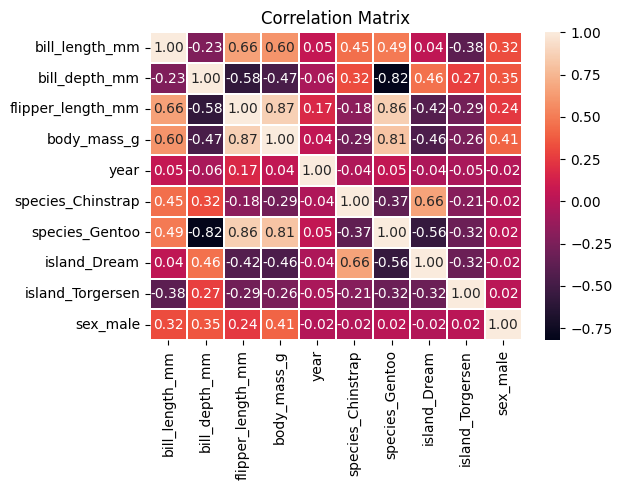

In [19]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.3) ## just 2 numbers after plot
plt.title('Correlation Matrix')
plt.show()

In [20]:
data_encoded.head(2) ## how it encoded

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year  \
0            39.1           18.7              181.0       3750.0  2007   
1            39.5           17.4              186.0       3800.0  2007   

   species_Chinstrap  species_Gentoo  island_Dream  island_Torgersen  sex_male  
0              False           False         False              True      True  
1              False           False         False              True     False

In [24]:
sns.__version__

'0.13.2'

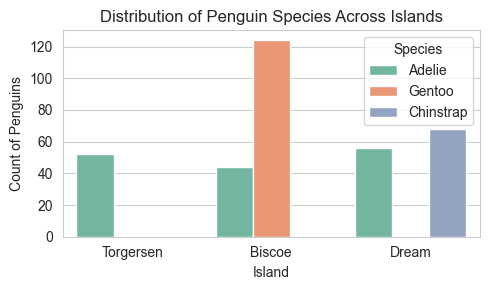

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Visualization 1: Distribution of Penguin Species across Islands
plt.figure(figsize=(5,3))
sns.countplot(data=data, x='island', hue='species', palette='Set2')
plt.title('Distribution of Penguin Species Across Islands')
plt.xlabel('Island')
plt.ylabel('Count of Penguins')
plt.legend(title='Species')
plt.tight_layout()
plt.show()

<Figure size 300x100 with 0 Axes>

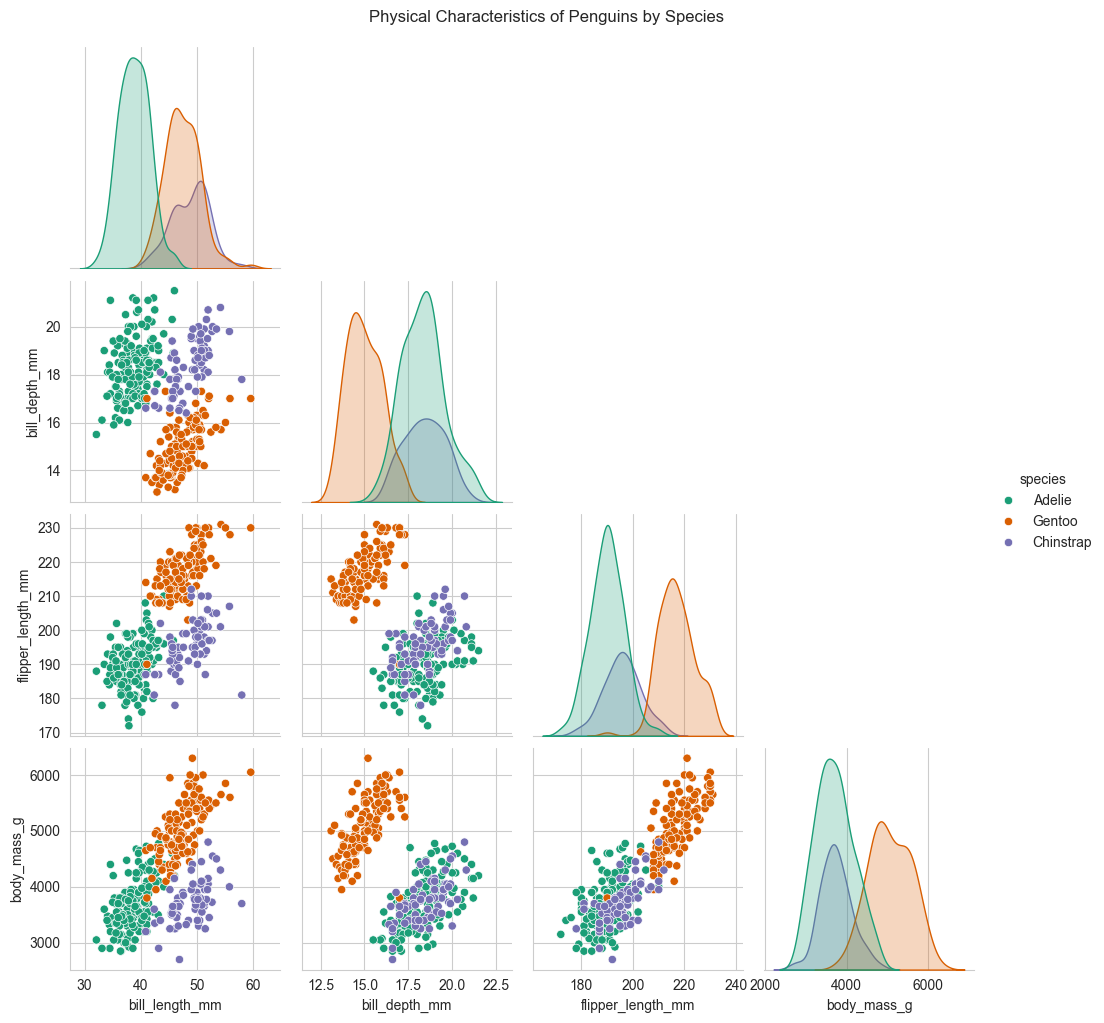

In [57]:
# Visualization 2: Comparison of Physical Characteristics Across Species
# For this, we'll create a pair plot to visualize the relationships between all physical characteristics
plt.figure(figsize=(3,1))
sns.pairplot(data, hue='species', vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], palette='Dark2', corner=True)
plt.suptitle('Physical Characteristics of Penguins by Species', y=1.02)
plt.show()

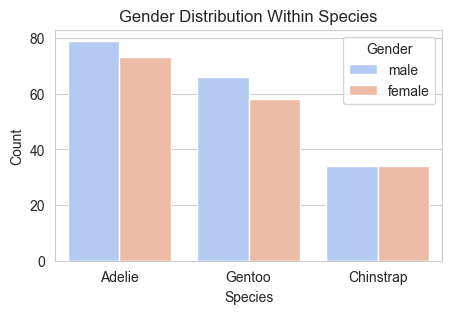

In [63]:
# Visualization: Gender Distribution Within Each Species
plt.figure(figsize=(5,3))
sns.countplot(x='species', hue='sex', data=data, palette='coolwarm')
plt.title('Gender Distribution Within Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

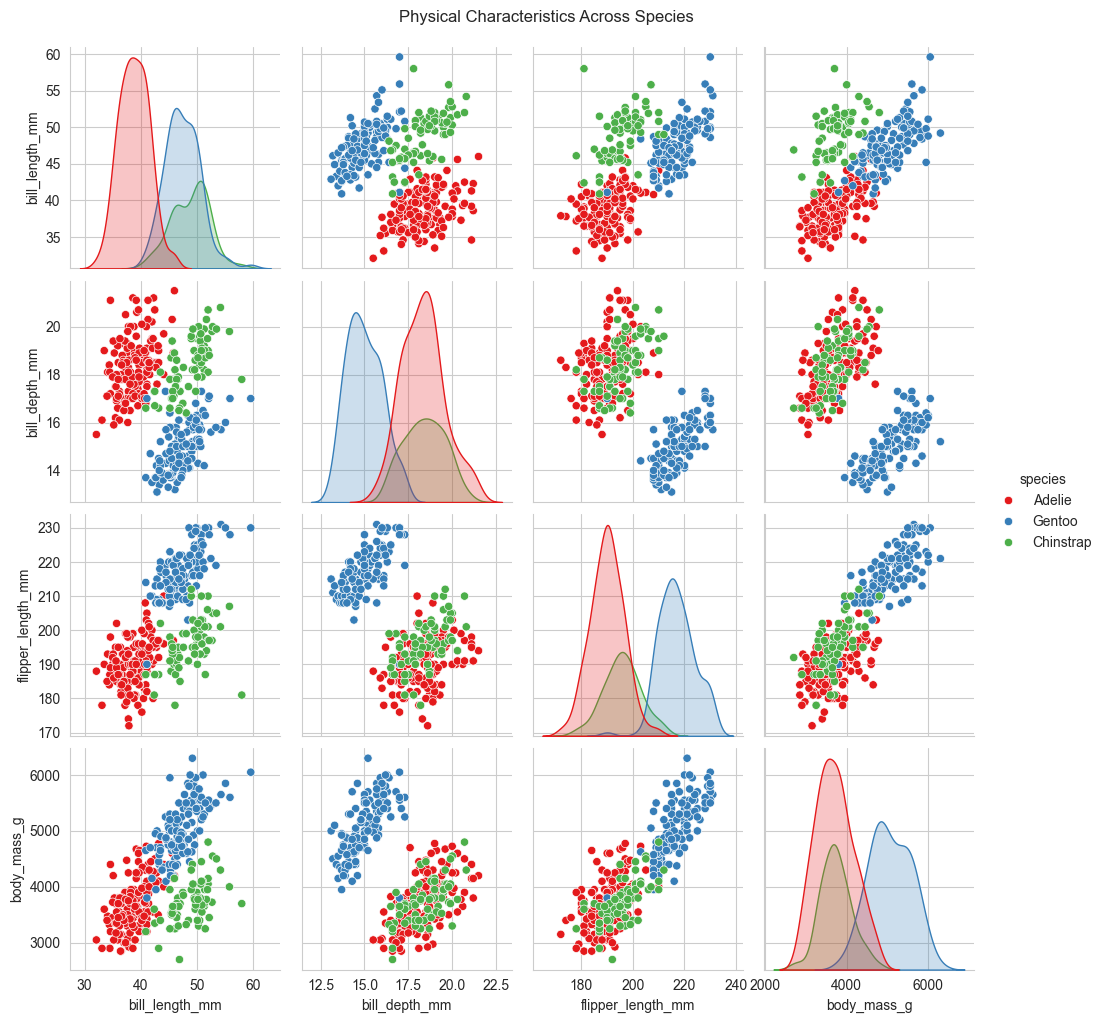

In [64]:
# Visualization: Physical Characteristics Across Species
sns.pairplot(data, hue='species', vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], palette='Set1')
plt.suptitle('Physical Characteristics Across Species', y=1.02)
plt.show()

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

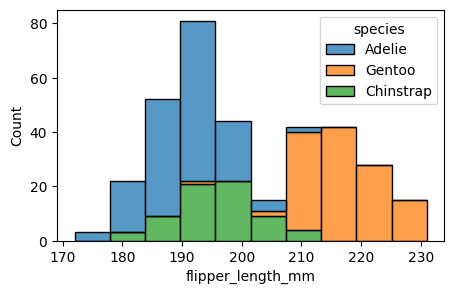

In [21]:
plt.figure(figsize=(5,3))
sns.histplot(data, x="flipper_length_mm", hue="species", multiple="stack",)   ### species wise

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

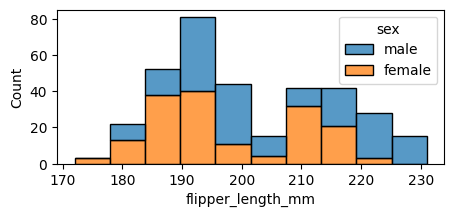

In [22]:
plt.figure(figsize=(5,2))
sns.histplot(data, x="flipper_length_mm", hue="sex" ,multiple="stack",)  ##sex wise

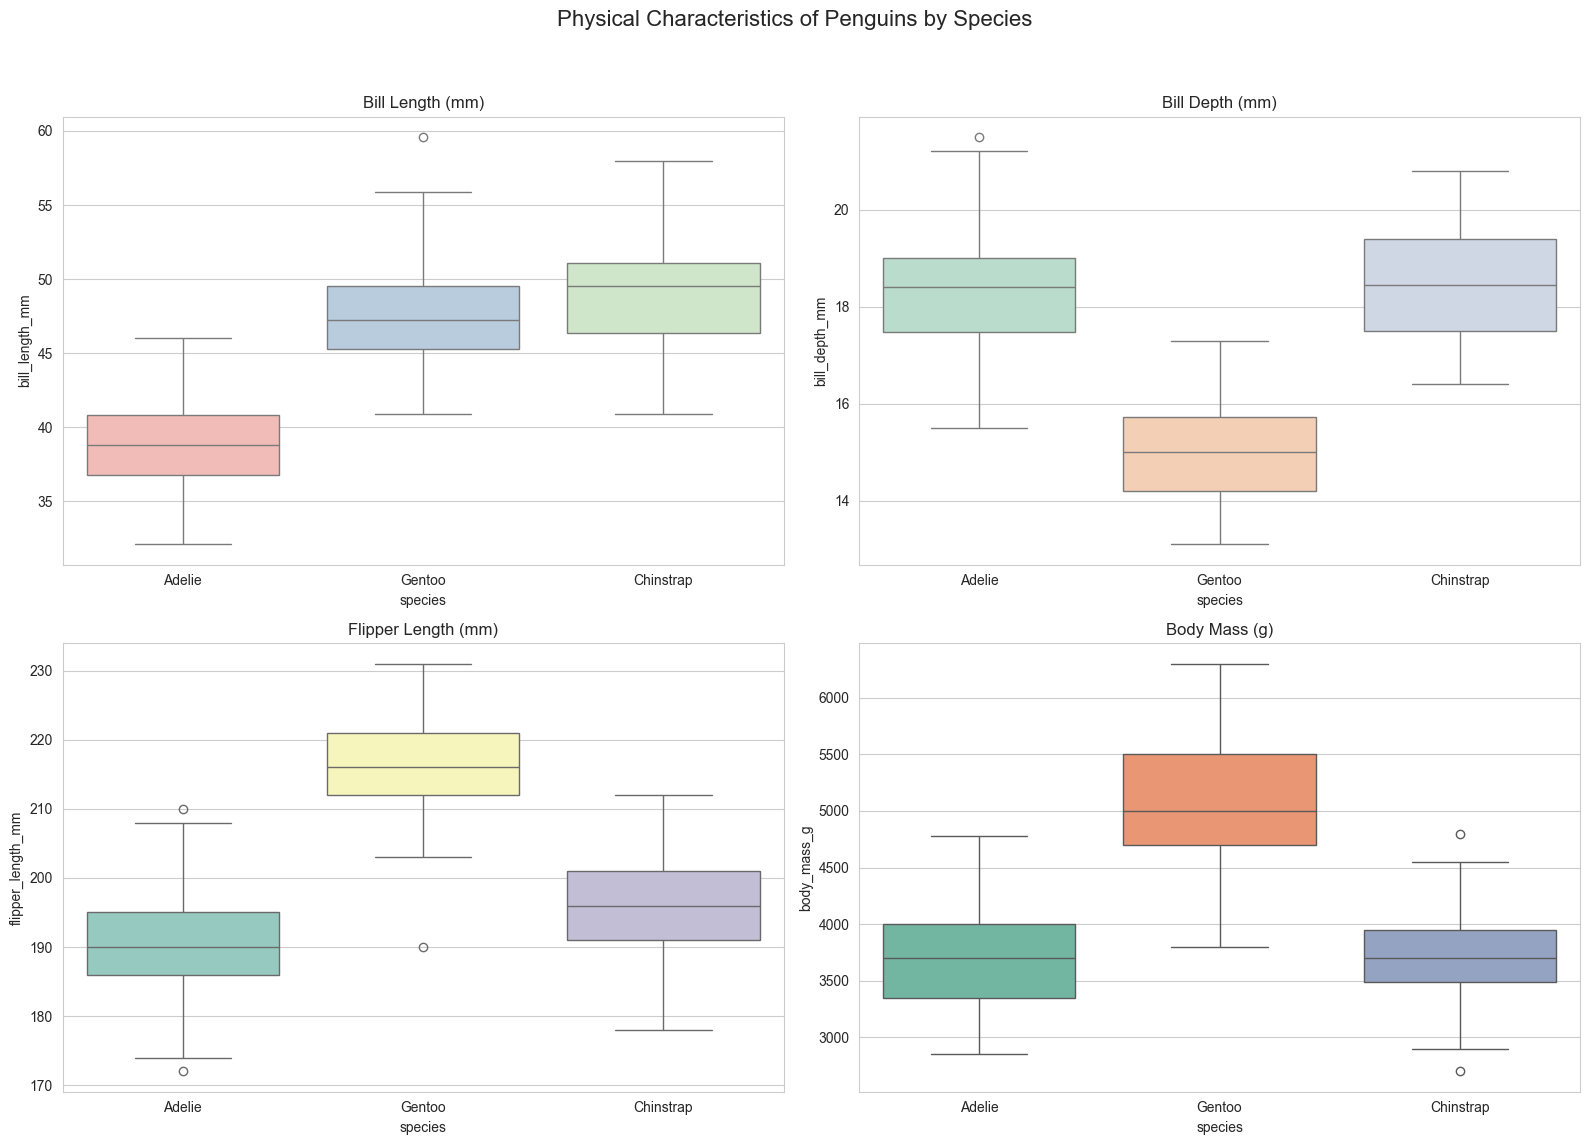

In [58]:
# Since the pairplot encountered an issue, we'll generate individual boxplots for each physical characteristic by species.

# Visualization: Physical Characteristics by Species
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Physical Characteristics of Penguins by Species', fontsize=16)

# Bill Length
sns.boxplot(ax=axes[0, 0], data=data, x='species', y='bill_length_mm', palette='Pastel1')
axes[0, 0].set_title('Bill Length (mm)')

# Bill Depth
sns.boxplot(ax=axes[0, 1], data=data, x='species', y='bill_depth_mm', palette='Pastel2')
axes[0, 1].set_title('Bill Depth (mm)')

# Flipper Length
sns.boxplot(ax=axes[1, 0], data=data, x='species', y='flipper_length_mm', palette='Set3')
axes[1, 0].set_title('Flipper Length (mm)')

# Body Mass
sns.boxplot(ax=axes[1, 1], data=data, x='species', y='body_mass_g', palette='Set2')
axes[1, 1].set_title('Body Mass (g)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

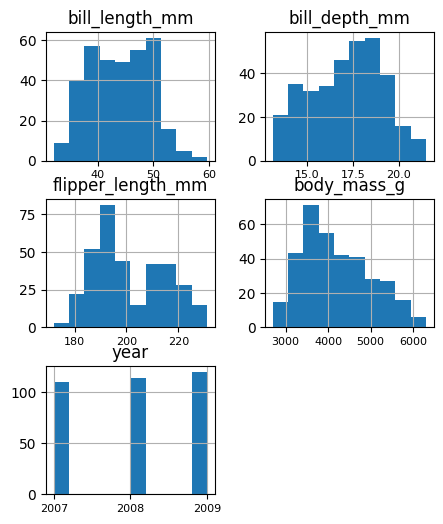

In [25]:
data_numeric = data[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','year']]
# all distributed
data_numeric.hist(figsize=(5,6), xlabelsize = 8);

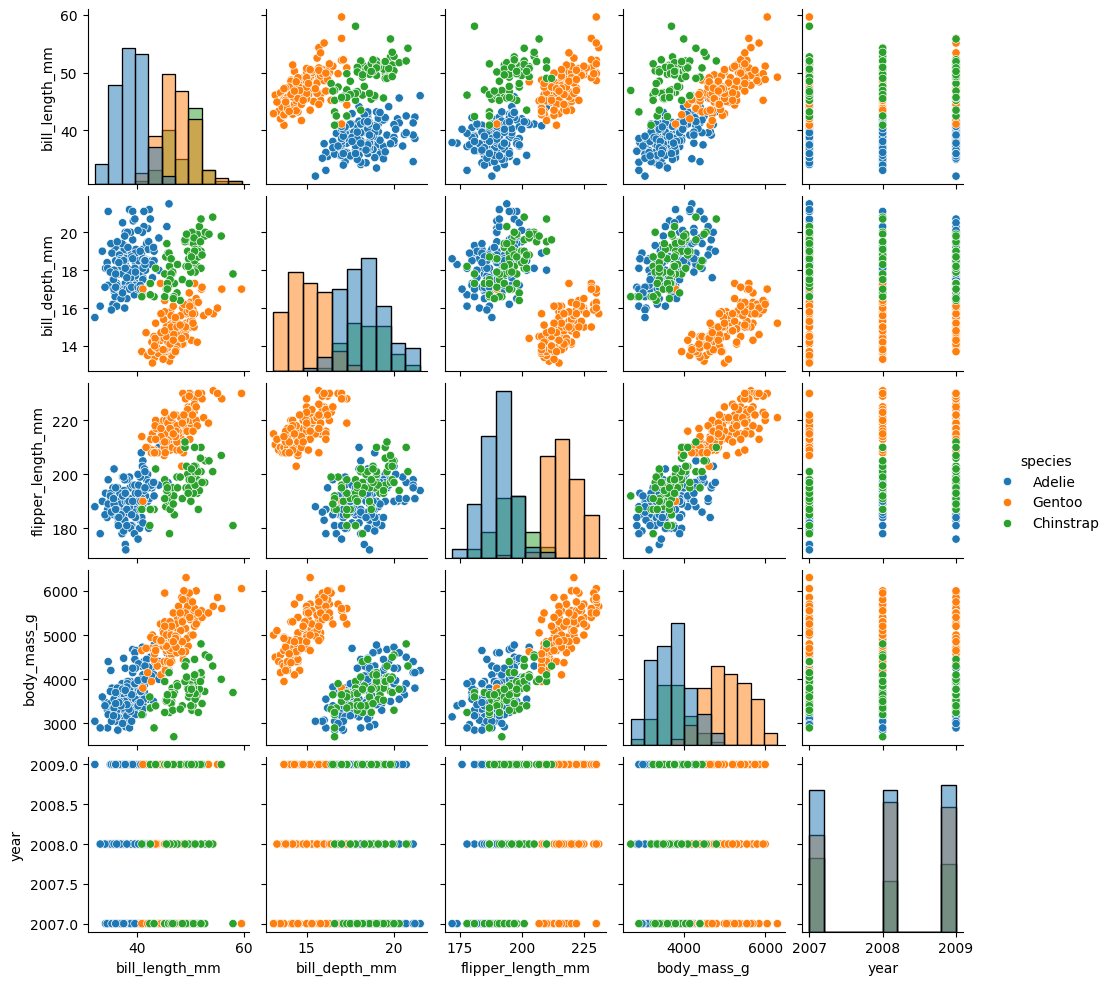

In [26]:
sns.pairplot(data, hue="species", size=2,diag_kind="hist")

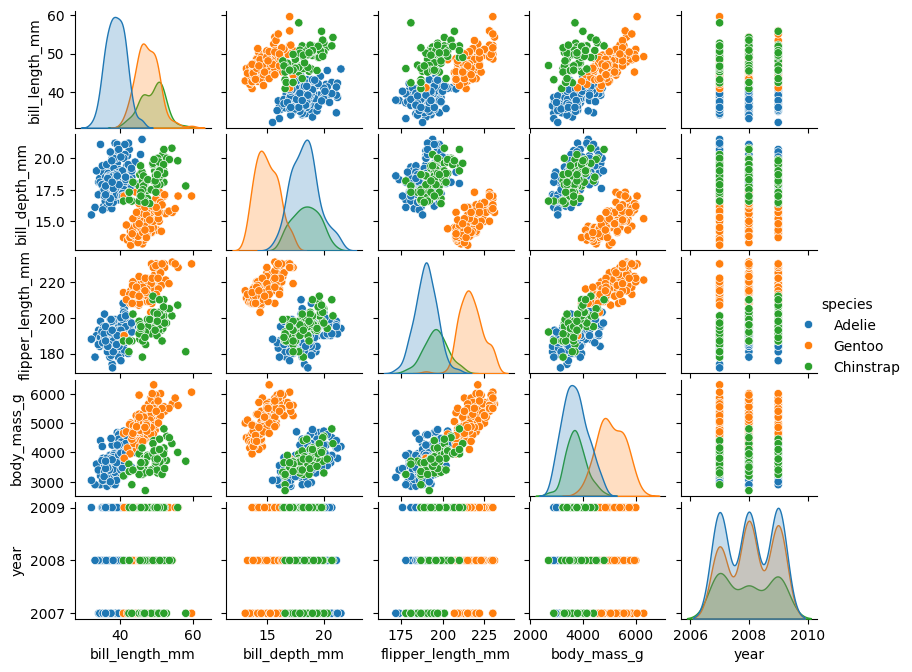

In [28]:
pairplot_figure = sns.pairplot(data, hue="species")
pairplot_figure.fig.set_size_inches(9, 6.5)

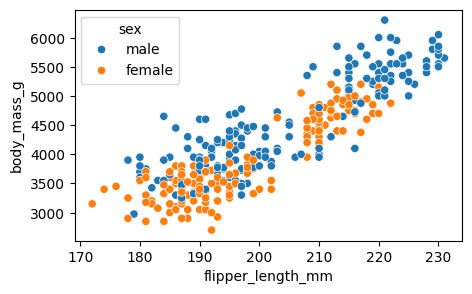

In [29]:
feature_name = "flipper_length_mm"
target_column = "body_mass_g"
plt.figure(figsize=(5,3))
scatter = sns.scatterplot(data, x=feature_name, y=target_column, hue='sex')

<Figure size 100x100 with 0 Axes>

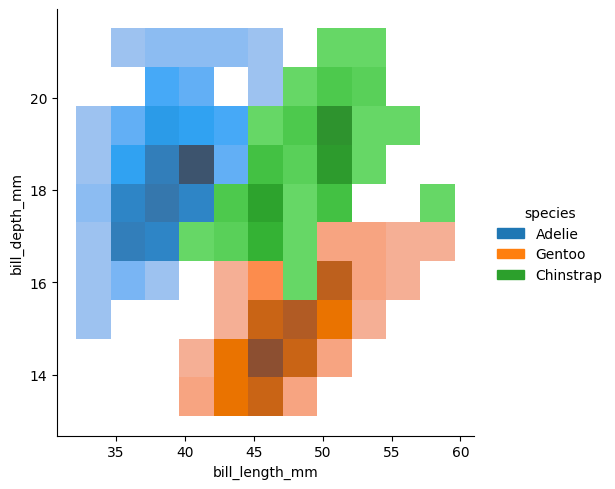

In [35]:
plt.figure(figsize=(1,1))
sns.displot(data, x="bill_length_mm", y="bill_depth_mm", hue="species")

In [38]:
## Species Based Gender 
import plotly.express as px
px.bar( data_frame=data, y = 'island', 
        facet_row='species',facet_row_spacing=0.10, 
        pattern_shape='species',
        color='species', 
        color_discrete_map={'Adeile':'rgb(251,117,4)', 'Chinstrap':'rgb(167,98,188)', 'Gentoo':'rgb(4,115,116)'},
        width=600,height=400 )

In [41]:
fig =px.bar( data_frame=data, y = 'sex',

facet_row='species',facet_row_spacing=0.10,

pattern_shape='species',

color='species',

color_discrete_map={'Adeile':'rgb(251,117,4)', 'Chinstrap':'rgb(167,98,188)', 'Gentoo':'rgb(4,115,116)'},

width=500,height=300 )

fig.show()

In [43]:
## plot based on gender
fig = px.scatter(data_frame=data, x='flipper_length_mm' , y = 'body_mass_g', 
                 facet_col='species', color='sex',
                 color_discrete_map={'Male':'darkblue','Female':'deeppink'}
                 )
fig.update_layout(showlegend = False,height=300,title='Species based Gender scatter plot', 
                   titlefont = dict(size =36, color='black', family='Open Sans',), 
                   font=dict(size=14,color='black'))
fig.show()

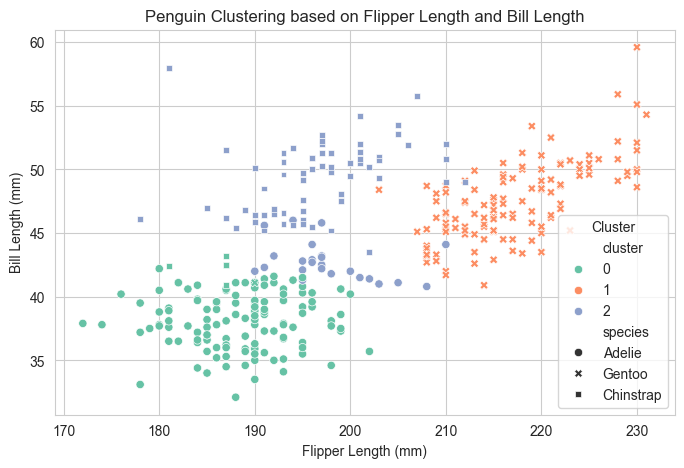

0.446351092083898

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Selecting features for clustering
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = data[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Adding the cluster labels to the dataset for visualization
data['cluster'] = kmeans.labels_

# Calculating silhouette score to evaluate the quality of the clusters formed
silhouette = silhouette_score(X_scaled, kmeans.labels_)

# Visualization: Clusters formed in the data
plt.figure(figsize=(8,5))
sns.scatterplot(x='flipper_length_mm', y='bill_length_mm', hue='cluster', data=data, palette='Set2', style='species')
plt.title('Penguin Clustering based on Flipper Length and Bill Length')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Bill Length (mm)')
plt.legend(title='Cluster')
plt.show()

silhouette

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encoding categorical variables
le_species = LabelEncoder()
data['species_encoded'] = le_species.fit_transform(data['species'])
le_sex = LabelEncoder()
data['sex_encoded'] = le_sex.fit_transform(data['sex'])
le_island = LabelEncoder()
data['island_encoded'] = le_island.fit_transform(data['island'])

# Preparing data for classification
X_class = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_encoded', 'island_encoded']]
y_class = data['species_encoded']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluating the models
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Baseline Accuracy: Predicting the most common species
baseline_accuracy = y_class.value_counts(normalize=True).max()

(accuracy_knn, accuracy_rf, baseline_accuracy)

(0.7692307692307693, 1.0, 0.4418604651162791)

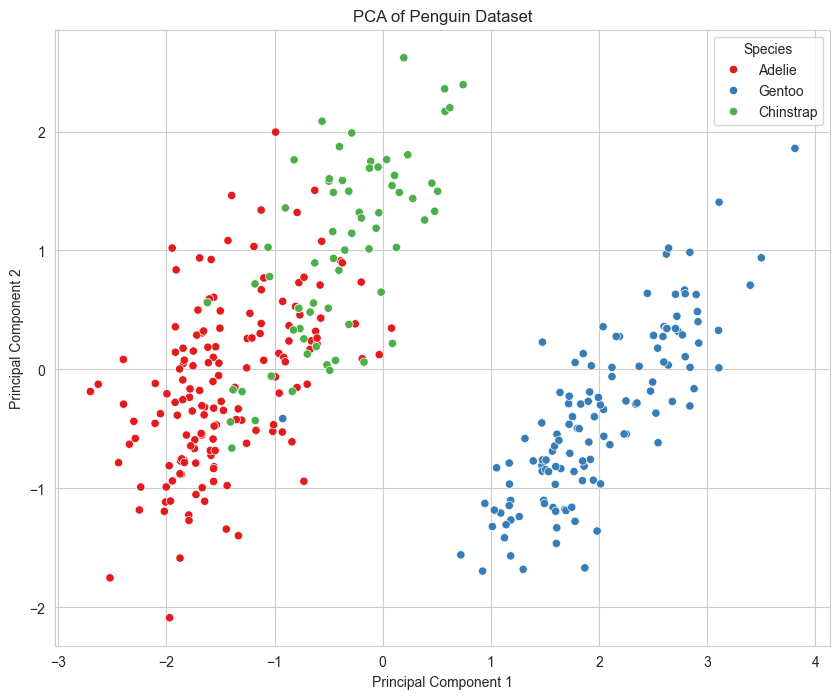

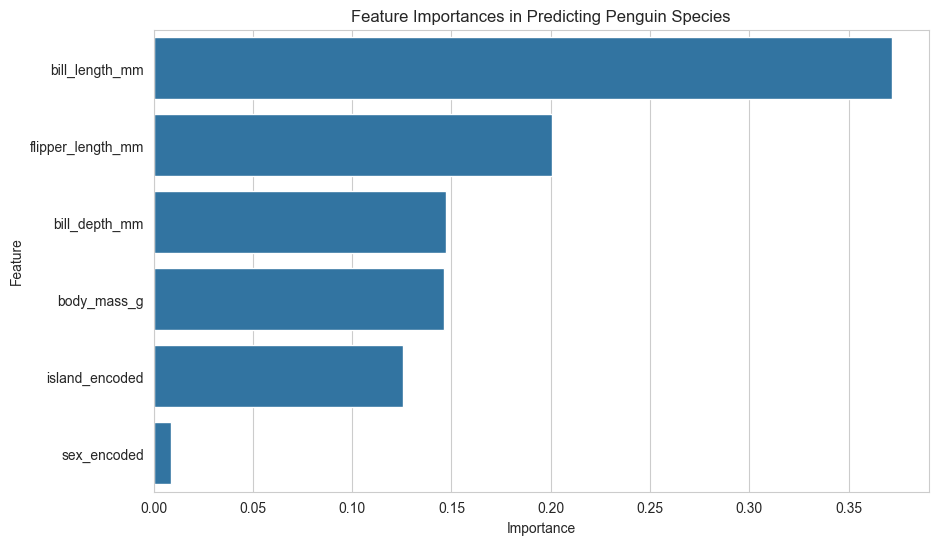

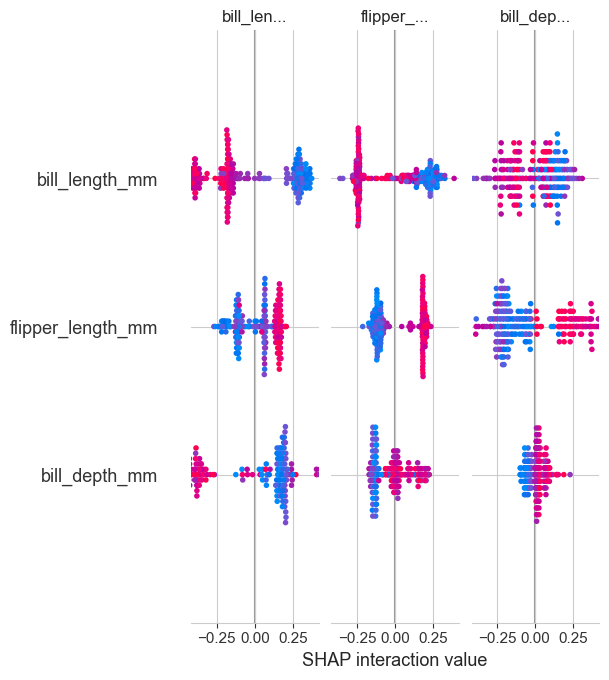

In [76]:
#!pip install shap
from sklearn.decomposition import PCA
import numpy as np
import shap

# Feature Importance from the Random Forest model
feature_importances = rf.feature_importances_
features = X_class.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # Use scaled features from earlier clustering step

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Species'] = le_species.inverse_transform(data['species_encoded'])

# Plotting the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Species', data=pca_df, palette='Set1')
plt.title('PCA of Penguin Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()

# Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances in Predicting Penguin Species')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Calculate SHAP values - Note: This can be computationally intensive for large models/datasets
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

# Summary plot of SHAP values for the Random Forest model
shap.summary_plot(shap_values, X_train, feature_names=X_class.columns)


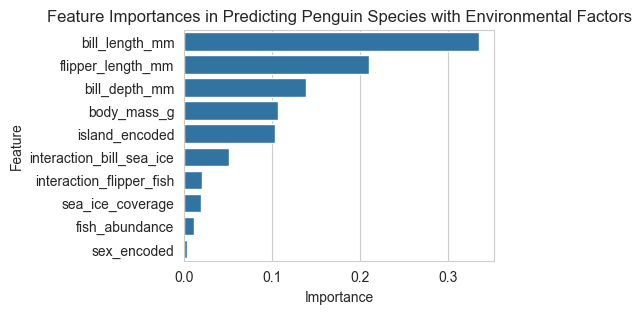

0.9807692307692307

In [80]:
# Simulate environmental data
np.random.seed(42)
data['sea_ice_coverage'] = np.random.uniform(0.5, 1.0, size=len(data))
data['fish_abundance'] = np.random.uniform(0.5, 1.0, size=len(data))

# Feature Engineering: Interaction between physical traits and environmental factors
data['interaction_flipper_fish'] = data['flipper_length_mm'] * data['fish_abundance']
data['interaction_bill_sea_ice'] = data['bill_length_mm'] * data['sea_ice_coverage']

# Prepare the dataset including the new features
X_extended = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_encoded', 'island_encoded', 'sea_ice_coverage', 'fish_abundance', 'interaction_flipper_fish', 'interaction_bill_sea_ice']]
y_extended = data['species_encoded']

# Splitting the extended dataset into training and testing sets
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_extended, y_extended, test_size=0.3, random_state=42)

# Random Forest model with the extended dataset
rf_ext = RandomForestClassifier(random_state=42)
rf_ext.fit(X_train_ext, y_train_ext)
y_pred_rf_ext = rf_ext.predict(X_test_ext)

# Evaluate the extended model
accuracy_rf_ext = accuracy_score(y_test_ext, y_pred_rf_ext)

# Feature Importance from the extended Random Forest model
feature_importances_ext = rf_ext.feature_importances_
features_ext = X_extended.columns
feature_importance_df_ext = pd.DataFrame({'Feature': features_ext, 'Importance': feature_importances_ext})

# Feature Importance Plot for the extended model
plt.figure(figsize=(4,3))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_ext.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances in Predicting Penguin Species with Environmental Factors')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

accuracy_rf_ext

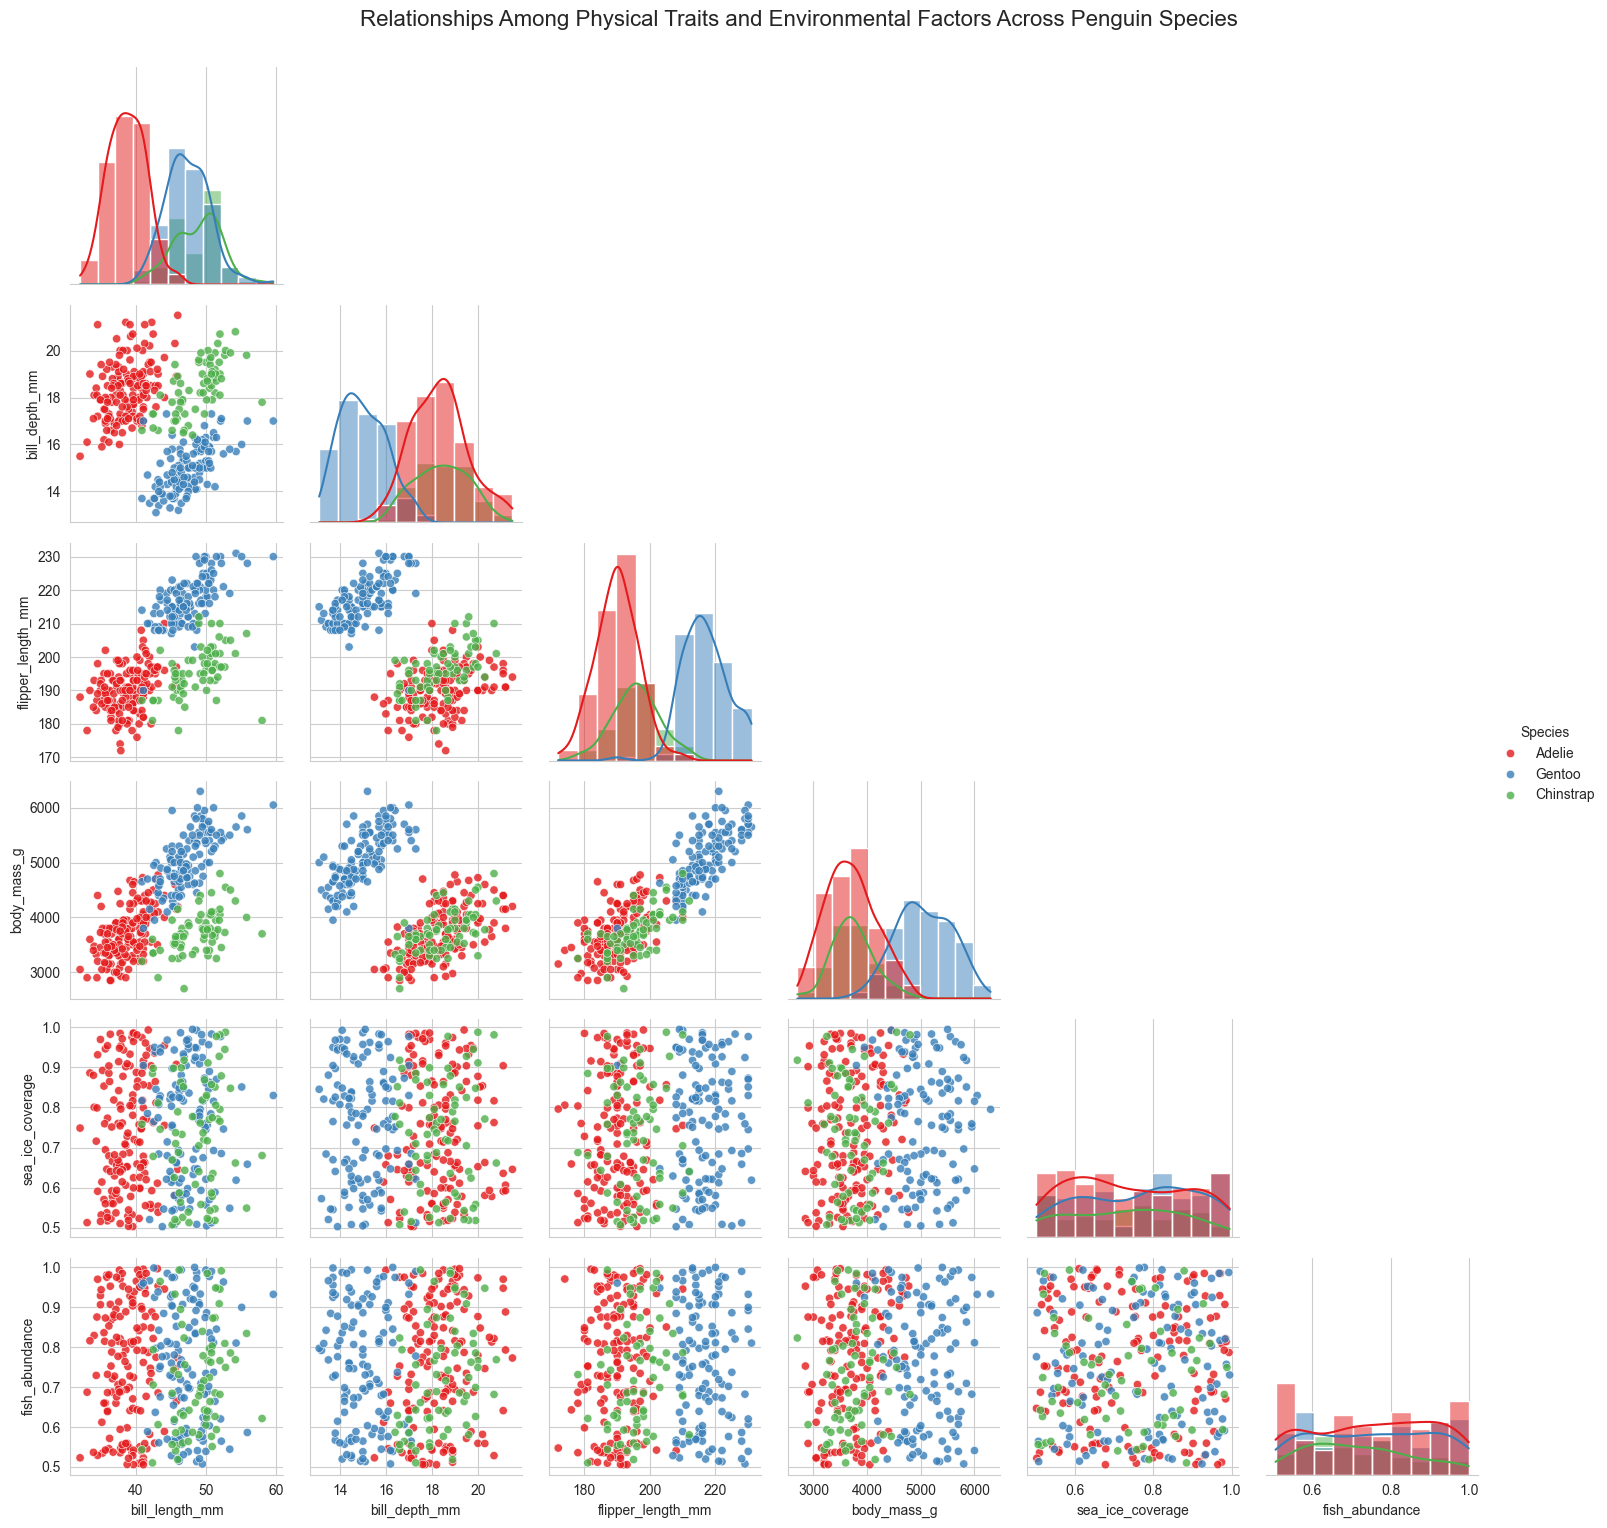

In [81]:
# Prepare a DataFrame that includes the species, physical traits, and simulated environmental factors
plot_data = data[['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sea_ice_coverage', 'fish_abundance']].copy()

# We'll use seaborn's PairGrid to create a pair plot that includes both scatter plots and histograms
g = sns.PairGrid(plot_data, hue='species', palette='Set1', corner=True)
g.map_lower(sns.scatterplot, alpha=0.8)
g.map_diag(sns.histplot, kde=True)

# Add legends and adjust aesthetics
g.add_legend(title='Species', adjust_subtitles=True)
g.fig.suptitle('Relationships Among Physical Traits and Environmental Factors Across Penguin Species', y=1.02, fontsize=16)
plt.show()


In [82]:
import plotly.express as px

# Prepare the DataFrame for Plotly
df_plotly = data[['species', 'bill_length_mm', 'bill_depth_mm', 'body_mass_g', 'sea_ice_coverage']].copy()
df_plotly['size'] = df_plotly['sea_ice_coverage'] * 100  # Adjust size for visibility

# Create an interactive 3D scatter plot
fig = px.scatter_3d(df_plotly, x='bill_length_mm', y='bill_depth_mm', z='body_mass_g',
                    color='species', size='size', hover_name='species',
                    title='Interactive 3D Scatter Plot of Penguin Species with Environmental Gradient',
                    labels={'bill_length_mm': 'Bill Length (mm)',
                            'bill_depth_mm': 'Bill Depth (mm)',
                            'body_mass_g': 'Body Mass (g)',
                            'size': 'Sea Ice Coverage'})

# Show the plot
fig.show()


In [ ]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
@st.cache
def load_data():
    data = pd.read_csv('penguins.csv')
    return data

# Main app
def main():
    st.title('Penguin Species Dashboard')
    
    data = load_data()

    # Sidebar - Species selection
    species = st.sidebar.multiselect('Select Species:', options=data['species'].unique(), default=data['species'].unique())
    
    # Filtering data
    data_filtered = data[data['species'].isin(species)]
    
    # Displaying data count
    st.write(f"Displaying {len(data_filtered)} out of {len(data)} records")
    
    # Plot
    st.header('Penguin Physical Traits')
    fig, ax = plt.subplots()
    sns.scatterplot(data=data_filtered, x='flipper_length_mm', y='bill_length_mm', hue='species', style='island', ax=ax)
    plt.xlabel('Flipper Length (mm)')
    plt.ylabel('Bill Length (mm)')
    st.pyplot(fig)

if __name__ == "__main__":
    main()

##### These visualizations provide a detailed comparison of the physical characteristics (bill length, bill depth, flipper length, and body mass) across the three penguin species in the dataset. Here are some insights:

Bill Length and Depth: There's noticeable variability in bill size among species, suggesting adaptations to different dietary preferences or ecological niches. For example, one species might have a longer bill suited for a particular type of prey.
Flipper Length: This characteristic varies significantly among species, likely reflecting differences in swimming style, speed, and foraging behavior.
Body Mass: The variance in body mass among species could indicate differences in overall size, fat reserves, and perhaps, strategies for surviving the harsh Antarctic winters.
To weave these insights into a captivating story:

Imagine the icy shores and crisp, chilly air of the Antarctic islands - a realm where the sturdy penguins call home. Among the snowflakes and icebergs, three distinct penguin species thrive, each adapted uniquely to the cold embrace of their environment.

The Adelie, with its moderate bill and flipper size, masters the balance of agility and precision, darting through the water in pursuit of fish. The Gentoo, boasting longer flippers, cuts through the ocean currents like a sleek arrow, its larger body mass a testament to its robustness. Then there's the Chinstrap, identifiable by its distinctive bill, navigating the icy waters with grace and efficiency.

These differences are not mere quirks of nature but the result of millions of years of evolution, shaping each species to fit perfectly into their niche in the Antarctic ecosystem. From the varied lengths of their bills, attuned to their dietary needs, to the sizes of their flippers, enabling their aquatic prowess, these characteristics tell a story of adaptation, survival, and the interconnected web of life in one of the planet's most extreme habitats.

In the dance of evolution, each species plays a role, each adaptation tells a story, and every penguin, from the smallest chick to the most majestic adult, is a character in the ongoing saga of life in the Antarctic

###### Exploring the interconnections within this dataset can reveal deeper insights into the intricate balance of the Antarctic ecosystem and the survival strategies of penguins. Let’s delve into innovative angles to understand the dynamics at play:

##### Ecological Niches and Island Preferences

The distribution of penguin species across different islands hints at ecological niches that each species has carved out for itself. For instance, specific islands may offer abundant food sources suited to the dietary preferences of a particular species or provide optimal nesting grounds that protect against predators and harsh weather conditions. This specialization in habitat choice can be seen as a sophisticated ecological negotiation, where each species leverages the environment’s resources to its advantage, minimizing competition through geographical and behavioral adaptations.

##### Adaptations Beyond Physical Characteristics

While our dataset focuses on physical traits, these attributes are just the tip of the iceberg. Penguins exhibit remarkable behavioral adaptations, such as their social structures, breeding strategies, and foraging behaviors, which are deeply interconnected with their physical traits. For example, species with longer flippers may not only be more efficient swimmers but may also undertake longer foraging trips, influencing their social and breeding behaviors. Exploring these behavioral aspects could provide a fuller picture of how physical and behavioral adaptations are intertwined in the quest for survival.

##### Climate Change and Survival Strategies

The backdrop to the story of Antarctic penguins is the looming challenge of climate change. As temperatures rise and ice melts, penguin species are forced to adapt to rapidly changing conditions. The physical characteristics and island preferences of penguin species may offer clues to their resilience or vulnerability in the face of climate change. For instance, species with more flexible dietary preferences or those capable of migrating to different islands may fare better than others. Understanding these dynamics can shed light on the future of these species and the Antarctic ecosystem as a whole.

### Innovative Data Exploration

Leveraging advanced data analysis techniques, such as machine learning models, could reveal hidden patterns and predict future trends in penguin populations. For instance, clustering algorithms could identify previously unrecognized subgroups within species, suggesting micro-evolutionary adaptations. Predictive models could assess the impact of environmental changes on penguin populations, guiding conservation efforts.

### Storytelling with Data

Imagine a dynamic visualization that not only shows the distribution of penguin species across islands but also integrates environmental data, such as sea ice extent, ocean temperatures, and fish populations. Users could explore how changes in these parameters might affect penguin populations, offering an immersive way to understand the complex interplay between species and their environment.

In conclusion, the penguin dataset opens a window into the fascinating world of Antarctic ecology, inviting us to explore beyond the numbers and consider the stories of adaptation, survival, and resilience that define life in one of Earth's final frontiers. Through innovative analysis and storytelling, we can deepen our understanding of these remarkable creatures and the challenges they face in a rapidly changing world.

In [30]:
## add more visualisations and

## find relation
## get insights

In [31]:
# Group the data by 'island' and 'sex' and count the occurrences
counts = data.groupby(['island', 'sex']).size().unstack()

# Print the counts
print("Counts of female and male penguins separated by island:")
print(counts)

Counts of female and male penguins separated by island:
sex        female  male
island                 
Biscoe         80    88
Dream          61    63
Torgersen      24    28


In [32]:
# Group the data by 'sex' and other relevant columns and count the occurrences
gender_counts = data.groupby(['sex', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']).size()

# Print the counts for female and male penguins separately
female_counts = gender_counts.loc['female']
male_counts = gender_counts.loc['male']

print("Female penguins counts:")
print(female_counts)

print("\nMale penguins counts:")
print(male_counts)

Female penguins counts:
island     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
Biscoe     34.5            18.1           187.0              2900.0         1
           35.0            17.9           190.0              3450.0         1
                                          192.0              3725.0         1
           35.3            18.9           187.0              3800.0         1
           35.5            16.2           195.0              3350.0         1
                                                                           ..
Torgersen  39.6            17.2           196.0              3550.0         1
           40.2            17.0           176.0              3450.0         1
           40.3            18.0           195.0              3250.0         1
           40.9            16.8           191.0              3700.0         1
           41.1            17.6           182.0              3200.0         1
Length: 165, dtype: int64

Male penguins coun

In [33]:

# Step 1: Split the Data
X = data_encoded[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'year']]
y = data_encoded['body_mass_g']

# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Select a Regression Model
model = LinearRegression()

# Step 6: Train the Regression Model
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)


# Optionally, you can print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Absolute Error: 308.02649587158754
Mean Squared Error: 151843.287882499
Root Mean Squared Error: 389.67074291316635
R^2 Score: 0.7357471050344504
Coefficients: [  4.36801679  17.43432349  50.81176804 -97.47902415]
Intercept: 189245.25063400148


In [34]:
# Importing necessary libraries


# Selecting features and target variable
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']]
y = data['species']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train classification models
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("="*50)


Model: Random Forest
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        32
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

Model: Decision Tree
Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.88      0.93        32
   Chinstrap       0.87      1.00      0.93        13
      Gentoo       0.92      1.00      0.96        24

    accuracy                           0.94        69
   macro avg       0.93      0.96      0.94        69
weighted avg       0.95      0.94      0.94        69

Model: Logistic Regression
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support



<Figure size 500x300 with 0 Axes>

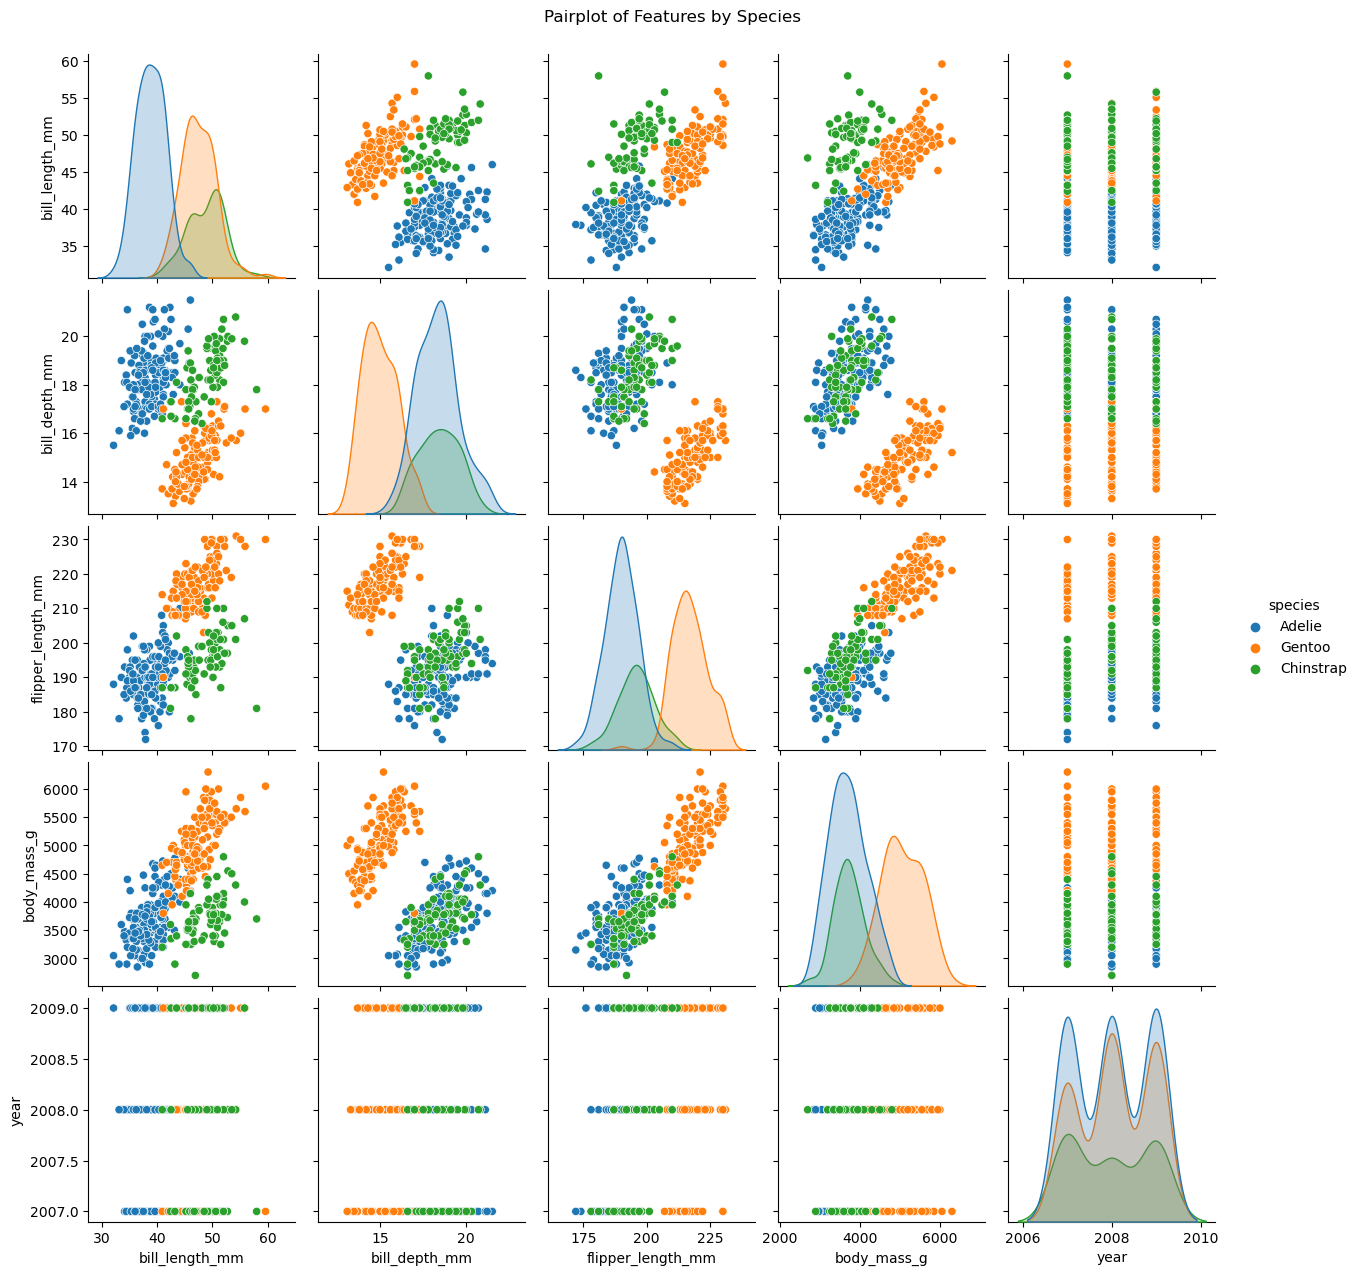

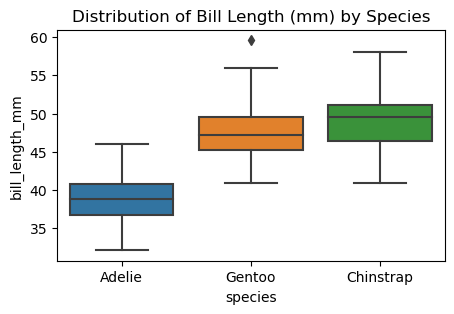

Random Forest Accuracy: 0.9855072463768116
Logistic Regression Accuracy: 0.9855072463768116
Baseline (Majority Class) Accuracy: 0.463768115942029
Random Forest Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        32
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        32
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



In [35]:
# 1. Exploratory Data Analysis (EDA)
# Visualize the distribution of each feature
plt.figure(figsize=(5,3))
sns.pairplot(data=data, hue='species')
plt.suptitle("Pairplot of Features by Species", y=1.02)
plt.show()

# Compare the distribution of each feature across different species of penguins
plt.figure(figsize=(5,3))
sns.boxplot(data=data, x='species', y='bill_length_mm')
plt.title("Distribution of Bill Length (mm) by Species")
plt.show()

# 2. Unsupervised Learning (K-Means Clustering)
# For example, let's cluster the data into three clusters (corresponding to the three species)
X_cluster = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_cluster)

# 3. Classification Algorithms
# Split the data into training and testing sets
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']]
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train classification models
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()

rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Evaluate models
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)

# Compare to baseline model (Majority class classifier)
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
baseline_pred = dummy_clf.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_pred)

print("Baseline (Majority Class) Accuracy:", baseline_accuracy)

# Classification reports
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))